In [23]:
import sys
sys.path.append("../MILESTONE1")

from file import preprocessing, df_suffle

In [24]:
X=[]
y=[]

for idx,row in df_suffle.iterrows():
    img=preprocessing(row['Image'])
    X.append(img)
    y.append(row['Brand'])

In [25]:
import numpy as np
import cv2
X = np.array(X)
y = np.array(y)

In [26]:
def noise_extract(img):
    img = img.squeeze()
    img_uint8 = (img * 255).astype(np.uint8)

    
    smooth = cv2.GaussianBlur(img_uint8, (5,5), 0)

    noise = img_uint8.astype(np.float32) - smooth.astype(np.float32)
    return noise


In [ ]:
!pip install --force-reinstall matplotlib opencv-python scikit-image


Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached scikit_image-0.26.0-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached imageio-2.37.2-py3-none-any.whl.metadata (9.7 kB)
  Using cached tifffile-2025.12.20-py3-none-any.whl.metadata (30 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-core 0.3.59 requires packaging<25,>=23.2, but you have packaging 25.0 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


In [27]:
import matplotlib.pyplot as plt

def v_noise(img, title="Noise Map"):
    noise = noise_extract(img)

    plt.figure(figsize=(3,3))
    plt.imshow(noise, cmap='gray')
    plt.title(title)
    plt.show()


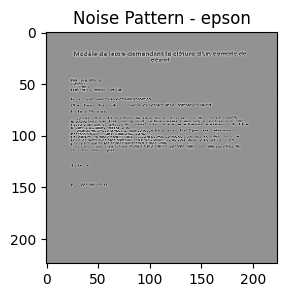

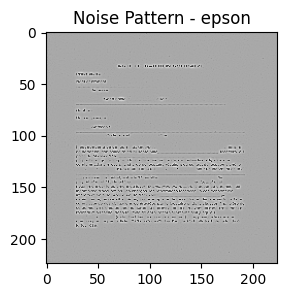

In [28]:
v_noise(X[10], title=f"Noise Pattern - {y[10]}")
v_noise(X[30], title=f"Noise Pattern - {y[30]}")

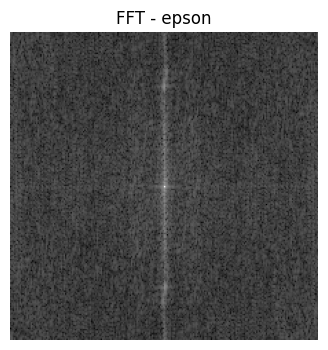

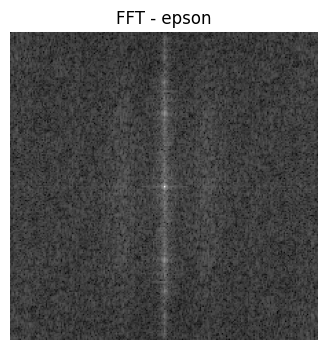

In [29]:
def fft_extract(img):
    img = img.squeeze()

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude = np.log(np.abs(fshift) + 1)

    return magnitude

def fft_v(img, title="FFT Spectrum"):
    fft_mag = fft_extract(img)

    plt.figure(figsize=(4,4))
    plt.imshow(fft_mag, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
    
fft_v(X[10], f"FFT - {y[10]}")
fft_v(X[30], f"FFT - {y[30]}")

In [ ]:
!pip install --force-reinstall scikit-image

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_image-0.26.0-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached numpy-2.4.0-cp313-cp313-win_amd64.whl.metadata (6.6 kB)
  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached networkx-3.6.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached imageio-2.37.2-py3-none-any.whl.metadata (9.7 kB)
  Using cached tifffile-2025.12.20-py3-none-any.whl.metadata (30 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached scikit_image-0.26.0-cp313-cp313-win_amd64.whl (11.9 MB)
Using cached imageio-2.37.2-py3-none-any.whl (317 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached networkx-3.6.1-py3-none-any.whl (2.1 MB)
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-core 0.3.59 requires packaging<25,>=23.2, but you have packaging 25.0 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.4.0 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


In [30]:
from skimage.feature import local_binary_pattern

def lbp(img, p=8, r=1):
    img = img.squeeze()
    img_uint8 = (img * 255).astype(np.uint8)

    lbp = local_binary_pattern(img_uint8, p, r, method='uniform')

    hist, _ = np.histogram(
        lbp.ravel(),
        bins=np.arange(0, p + 3),
        range=(0, p + 2)
    )

    hist = hist.astype("float")
    hist = hist/(hist.sum() + 1e-6)

    return hist

In [31]:
lbp_features = [] 
labels = [] 
for i in range(len(X)): 
    lbp_feat = lbp(X[i]) 
    lbp_features.append(lbp_feat) 
    labels.append(y[i]) 
    
lbp_features = np.array(lbp_features) 
labels = np.array(labels)

In [32]:
lbp_features

array([[0.13614078, 0.11551339, 0.04149394, ..., 0.10871732, 0.16173071,
        0.25946668],
       [0.13544324, 0.11864238, 0.04274952, ..., 0.10989318, 0.16422194,
        0.2551419 ],
       [0.00398597, 0.03204719, 0.00069754, ..., 0.1587213 , 0.33956473,
        0.17612006],
       ...,
       [0.02479273, 0.08806999, 0.00562022, ..., 0.13155692, 0.19549187,
        0.3115633 ],
       [0.00294962, 0.02198262, 0.00041853, ..., 0.15728635, 0.36822385,
        0.17105788],
       [0.00536113, 0.02782207, 0.00199298, ..., 0.15186543, 0.38263313,
        0.16127232]])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_train,X_test,y_train,y_test=train_test_split(
    lbp_features,
    labels,
    test_size=0.20,
    random_state=42,
    stratify=labels
)

In [42]:
svm=SVC(kernel='rbf',C=18,gamma='scale')
svm.fit(X_train,y_train)

y_pred=svm.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred))

0.92
              precision    recall  f1-score   support

       canon       0.90      0.90      0.90        40
       epson       0.90      0.90      0.90        40
          hp       1.00      1.00      1.00        20

    accuracy                           0.92       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.92      0.92      0.92       100



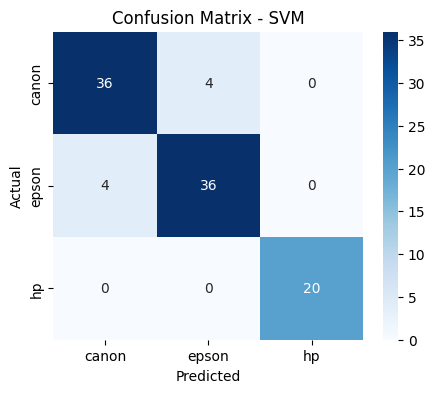

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


In [45]:
cv_scores = cross_val_score(svm, lbp_features,labels, cv=5)
print("Cross_Val_score",cv_scores)

Cross_Val_score [0.96 0.9  0.93 0.91 0.92]


In [46]:
image_path=df_suffle['Image'].iloc[1]
true_label=df_suffle['Brand'].iloc[1]

In [47]:
img=preprocessing(image_path)
imag_label=lbp(img)
imag_label=imag_label.reshape(1,-1)

predict_label=svm.predict(imag_label)[0]
print("Prediction Label",predict_label)
print("true_label",true_label)

Prediction Label hp
true_label hp


In [19]:
import joblib

joblib.dump(svm,"svm_scanner.pkl")

['svm_scanner.pkl']